## Exploring Weather Trends

### 1. Overview

The purpose of this project is to explore the trend in temperature over the years from both global and local aspects. As I live in Berlin, I have chosen the local city as Berlin and I will examine the trends in Berlin and compare it within the global scope. The dataset covers the years between 1750 and 2013 for Berlin.

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import data and explore dataset
df = pd.read_csv('temp_dataset.csv')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        264 non-null    int64  
 1   g_avg       264 non-null    float64
 2   berlin_avg  264 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 6.3 KB


,year,g_avg,berlin_avg
0,1750,8.72,9.83
1,1751,7.98,9.75
2,1752,5.78,4.84
3,1753,8.39,8.72
4,1754,8.47,8.49


There are 264 data in our table as an intersection of Berlin and global temperature datasets. The plot of raw data does not give meaningful information regarding the trend over time.

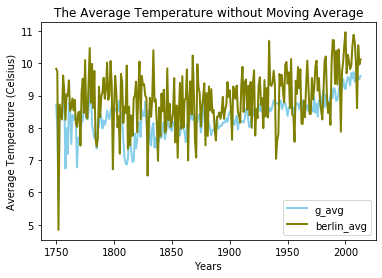

In [3]:
#Plot raw data to see the pattern
plt.plot('year', 'g_avg', data= df, color='skyblue', linewidth=2)
plt.plot('year', 'berlin_avg', data= df, color='olive', linewidth=2)
plt.legend()
plt.xlabel('Years')
plt.ylabel('Average Temperature (Celsius)')
plt.title('The Average Temperature without Moving Average')
plt.savefig('raw_plot.png')


### 2. Calculating Moving Average

Moving average is a useful method to smooth out time-series data to be able to make meaningful observations from the graphs. I applied the moving average method to the data by windowing 20 years and 50 years. Since we have 264 years of observation, it is possible to move the average around 50.

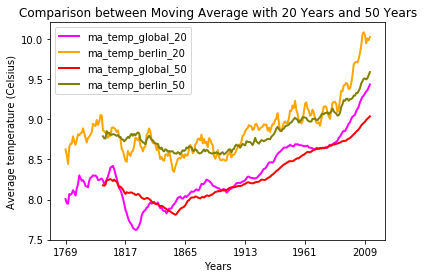

In [4]:
# Calculating moving average for both local and global temperature.
df['mavg_g_20'] = df.g_avg.rolling(window=20).mean()
df['mavg_b_20'] = df.berlin_avg.rolling(window=20).mean()
df['mavg_g_50'] = df.g_avg.rolling(window=50).mean()
df['mavg_b_50'] = df.berlin_avg.rolling(window=50).mean()

plt.plot(df.year, df.mavg_g_20, color='magenta', linewidth=2, label= 'ma_temp_global_20')
plt.plot(df.year, df.mavg_b_20, color='orange', linewidth=2, label= 'ma_temp_berlin_20')
plt.plot(df.year, df.mavg_g_50, color='red', linewidth=2, label= 'ma_temp_global_50')
plt.plot(df.year, df.mavg_b_50, color='olive', linewidth=2, label= 'ma_temp_berlin_50')
plt.xlabel('Years')
plt.ylabel('Average temperature (Celsius)')
plt.title('Comparison between Moving Average with 20 Years and 50 Years')
plt.xticks(np.arange(1769, 2013, step=48))
plt.legend()
plt.savefig('comparisonMa20Ma50.png')

As can be seen from the graph, moving average around 50 years make the data smoother. Therefore, I continue the analysis by using moving average of around 50 years.

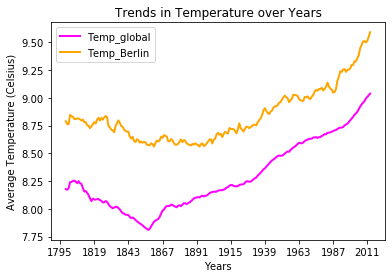

In [5]:
plt.plot(df.year, df.mavg_g_50, color='magenta', linewidth=2, label= 'Temp_global')
plt.plot(df.year, df.mavg_b_50, color='orange', linewidth=2, label= 'Temp_Berlin')
plt.xlabel('Years')
plt.ylabel('Average Temperature (Celsius)')
plt.xticks(np.arange(1795, 2013, step=24))
plt.legend()
plt.title('Trends in Temperature over Years')
plt.savefig('Trends.png')

### 3. Analysis
* Is there any relationship between global temperature and Berlin temperature over the years? 

The correlation coefficient (0.94) is quite close to 1. It suggests that there is a positive relationship between the trend in temperature in Berlin and the overall temperature.

In [6]:
corr_berlin_global = df['mavg_g_50'].corr(df['mavg_b_50'])
round(corr_berlin_global,3)

0.941

* What happened to the difference between the average temperature in Berlin and global temperature over time?

The difference between the global and Berlin's temperature is higher, around 0.77 Celsius on average, during the period between 1820 and 1860. A decreasing trend in the difference until the 1990s can be observed, however, the difference tends to increase again from 1995 and it reaches 0.55 in 2013.

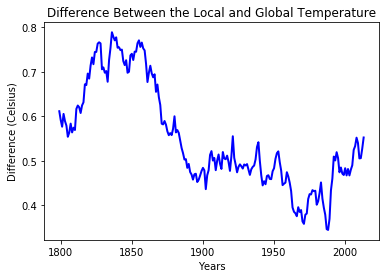

In [7]:
df['diff'] = df['berlin_avg']- df['g_avg']
df['mavg_diff'] = df['diff'].rolling(window=50).mean()
plt.plot(df['year'], df['mavg_diff'], color='blue', linewidth=2)
plt.title('Difference Between the Local and Global Temperature')
plt.xlabel('Years')
plt.ylabel('Difference (Celsius)')
plt.savefig('Diff.png')


### 4. Conclusion

* The yearly average temperature in Berlin is always higher than the global temperature.
* The average temperature in Berlin is between 8.5 and 9 Celsius until the mid-1950s, whereas the global temperature is between 7.75 and 8.5 Celsius in the same period.
* There is an increasing trend in average temperature both globally and locally. After the 1960s, the increase in temperature has been accelerated.
* The difference between the global and Berlin's temperature is higher, around 0.77 Celsius on average, during the period between 1820 and 1860. A decreasing trend in the difference until the 1990s can be observed, however, the difference tends to increase again from 1995 and it reaches 0.55 in 2013.
* There is a positive relationship between the trend in temperature in Berlin and overall temperature over the years.